# Lecture 4 - Linear Problem

In [78]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Non Linear Transformation (example)

<AxesSubplot:xlabel='x1', ylabel='x2'>

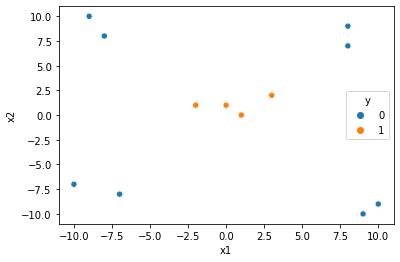

In [7]:
# Creating the dummy data.
dict = {
    'x1':[8,8,-8,-9,-10,-7,9,10,1,0,3,-2],
    'x2':[9,7,8,10,-7,-8,-10,-9,0,1,2,1],
    'y':[0,0,0,0,0,0,0,0,1,1,1,1]
}
df = pd.DataFrame(dict)
sns.scatterplot(data=df, x='x1', y='x2', hue='y')

<AxesSubplot:xlabel='x1*x1', ylabel='x2*x2'>

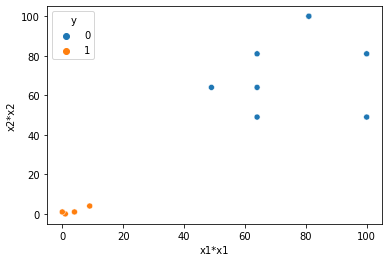

In [13]:
# Applying the non-linear transformation: variable ** 2.
df['x1*x1'] = df['x1'] ** 2
df['x2*x2'] = df['x2'] ** 2

sns.scatterplot(data=df, x='x1*x1', y='x2*x2', hue='y')

## Applying the Theory

**Objective:**
demonstrate the tradeoff between model complexity and errors, both in sample and out of sample.

<div>
<img src="img/theory.PNG" width="800"/>
<div>

In [85]:
# Creating the population dataset.
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, class_sep=0.8, flip_y=0.2, random_state=52)
df_population = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'x3': X[:,2], 'y':y})

print(df_population.shape)
px.scatter_3d(df_population, x='x1', y='x2', z='x3', color='y', width=700, height=500)

(1000, 4)


In [93]:
# Applying feature engineering to increase the complexity of the model.apply

# Extra features 1: above p50
df_population['x1_above_p50'] = np.where(df_population['x1'] > np.percentile(df_population['x1'], 50), 1, 0)
df_population['x2_above_p50'] = np.where(df_population['x2'] > np.percentile(df_population['x2'], 50), 1, 0)
df_population['x3_above_p50'] = np.where(df_population['x3'] > np.percentile(df_population['x3'], 50), 1, 0)

# Extra features 2: outliers
df_population['x1_outliers'] = np.where((df_population['x1'] > np.percentile(df_population['x1'], 90)) | (df_population['x1'] < np.percentile(df_population['x1'], 10)), 1, 0)
df_population['x2_outliers'] = np.where((df_population['x2'] > np.percentile(df_population['x2'], 90)) | (df_population['x2'] < np.percentile(df_population['x2'], 10)), 1, 0)
df_population['x3_outliers'] = np.where((df_population['x3'] > np.percentile(df_population['x3'], 90)) | (df_population['x3'] < np.percentile(df_population['x3'], 10)), 1, 0)

df_population

,x1,x2,x3,y,x1_above_p50,x2_above_p50,x3_above_p50,x1_outliers,x2_outliers,x3_outliers
0,0.803994,2.033649,-2.812346,0,1,1,0,1,1,1
1,-0.220135,-0.226271,1.972786,0,1,1,1,0,0,1
2,-0.603037,-0.875850,0.879808,0,1,0,1,0,0,0
3,0.028880,1.890230,-0.734426,1,1,1,0,0,1,0
4,0.541487,2.301730,-0.929440,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
995,-0.942356,-0.304019,0.734179,0,0,0,1,0,0,0
996,-0.445548,1.784290,-2.191351,1,1,1,0,0,0,1
997,-1.024155,0.824275,-1.609685,0,0,1,0,0,0,1
998,-0.340392,-0.009707,-0.769571,1,1,1,0,0,0,0


In [94]:
# Extracting the sample dataset.
df_sample = df_population.sample(200)

print(df_sample.shape)
px.scatter_3d(df_sample, x='x1', y='x2', z='x3', color='y', width=700, height=500)

(200, 10)


In [95]:
def train_test_metric(df, list_columns):
    """
    Split the base, train, test and metric given a dataset and list of columns.
    """
    # Separating the train and test data.
    X = df[list_columns]
    y = df['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)
    
    # Train and test the model.
    model = DecisionTreeClassifier(max_depth=100, random_state=52)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metric its performance
    acc = accuracy_score(y_test, y_pred)

    return acc

In [71]:
train_test_metric(df_sample, ['x1'])

0.5

In [72]:
train_test_metric(df_sample, ['x1', 'x2'])

0.8

In [73]:
train_test_metric(df_sample, ['x1', 'x2', 'x3'])

0.8

In [50]:
# In sample error

# TO BE CONTINUED

,x1,x2,x3
975,0.684091,2.078014,-1.404079
824,-1.535108,-0.285410,0.139239
638,0.247996,1.459666,-1.147104
338,-0.213215,-1.579862,1.201735
82,-1.127991,0.294400,1.075323
...,...,...,...
389,1.440948,2.869866,-1.574528
948,-1.373160,-0.668436,0.223015
188,-2.272662,-0.571224,-0.034830
857,-0.166359,1.251511,-0.668959
